### 集成学习方法

#### 使用 hard Voting Classifier

In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

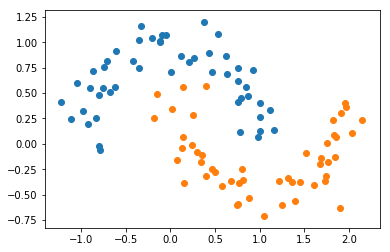

In [13]:
X,y=make_moons(noise=0.15,random_state=111)
X_train,X_test,y_train,y_test=train_test_split(X,y)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [14]:
voting_clf=VotingClassifier(estimators=[
    ('decison_tree',DecisionTreeClassifier(random_state=888)),
    ('svm',SVC()),
    ('logistic',LogisticRegression())],
    voting='hard')

In [15]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.88

#### 使用soft Voting Classifier

In [16]:
voting_clf=VotingClassifier(estimators=[
    ('decison_tree',DecisionTreeClassifier(random_state=888)),
    ('svm',SVC(probability=True)),
    ('logistic',LogisticRegression())],
    voting='soft')

In [17]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92000000000000004

#### bagging VS pasting (放回采样和不放回采样)

sklearn使用bootstrap参数控制采样时是否放回。

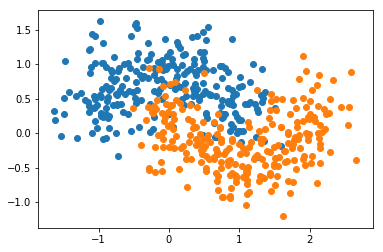

In [18]:
X,y=make_moons(n_samples=500,noise=0.3,random_state=111)
X_train,X_test,y_train,y_test=train_test_split(X,y)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [19]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500, max_samples=100,
                           bootstrap=True)
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.90400000000000003

In [20]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=10, max_samples=50,
                           bootstrap=False)
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.86399999999999999

In [21]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=5000, max_samples=200,
                           bootstrap=True)
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.92800000000000005